In [4]:
import os

current_directory = os.getcwd()


file_path = os.path.join(current_directory, "2__10916__табл данные.txt")

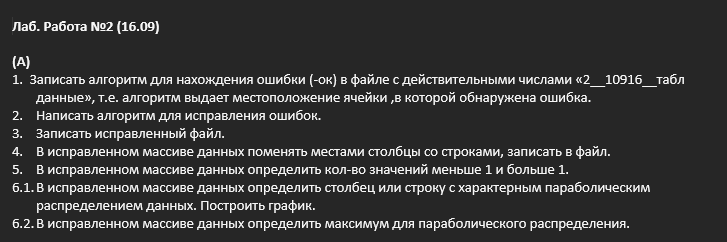

In [1]:
from matplotlib import pyplot as plt

def find_errors(filename):
  errors = []
  with open(filename, 'r') as file:
    lines = file.readlines()
    for row_index, line in enumerate(lines):
      values = line.strip().split()
      for col_index, value in enumerate(values):
        try:
          float(value)
        except ValueError:
          print('(',row_index,';',col_index,'):\t',value) 
          errors.append((row_index, col_index))
  return errors


def correct_errors(filename):
  data = []
  with open(filename, 'r') as file:
    lines = file.readlines()
    for line in lines:
      values = line.strip().split()
      data.append([float(v) if v.replace('.', '', 1).isdigit() else np.nan for v in values])

  # Замена NaN на среднее значение соседей
  data = np.array(data)
  nan_indices = np.argwhere(np.isnan(data))
  for row, col in nan_indices:
    neighbors = []
    if row > 0: neighbors.append(data[row - 1, col])  # верхний сосед
    if row < data.shape[0] - 1: neighbors.append(data[row + 1, col])  # нижний сосед
    if col > 0: neighbors.append(data[row, col - 1])  # левый сосед
    if col < data.shape[1] - 1: neighbors.append(data[row, col + 1])  # правый сосед
    neighbors = [n for n in neighbors if not np.isnan(n)]
    data[row, col] = np.mean(neighbors) if neighbors else 0

  return data


def save_corrected_data(data, filename):
  with open(filename, 'w') as file:
    for row in data:
      file.write(" ".join(map(str, row)) + "\n")

def transpose_data(data):
  return np.transpose(data)


def count_values(data):
  less_than_one = np.sum(data < 1)
  greater_than_one = np.sum(data > 1)
  return less_than_one, greater_than_one


import numpy as np


def is_parabolic(row):
    peak_index = np.argmax(row)
    left_part = row[:peak_index]
    right_part = row[peak_index+1:]
    
    if not np.all(np.diff(left_part) > 0):
        return False
    if not np.all(np.diff(right_part) < 0):
        return False
    return True

def find_maximum_parabola(data, col_index):
  x = np.arange(data[col_index,:].shape[0])
  y = data[col_index,:]

  # Полиномиальная аппроксимация
  coeffs = np.polyfit(x, y, 2)

  # Коэффициенты a, b, c для параболы ax^2 + bx + c
  a, b, c = coeffs

  # Максимум параболы: x_max = -b / (2a)
  if a != 0:  # Проверяем, что это действительно парабола
    x_max = -b / (2 * a)
    y_max = np.poly1d(coeffs)(x_max)  # Значение y в точке максимума
    return x_max, y_max
  else:
    return None, None  # Это прямая, а не парабола


def plot_parabolic(data, col_index):
  x = np.arange(data[col_index, :].shape[0])
  y = data[col_index, :]

  # Полиномиальная аппроксимация
  coeffs = np.polyfit(x, y, 2)
  poly = np.poly1d(coeffs)
  fit_values = poly(x)

  # Построение графика
  plt.plot(x, fit_values, '-', label='Аппроксимационная parabola')
  plt.plot(x, y, '-', label='Базовая parabola')
  plt.legend()
  plt.show()

In [2]:
filename = r"C:\Users\bulyn\ПАД\---\lab2\2__10916__табл данные.txt"

# 1. Найти ошибки
find_errors(filename)

# 2. Исправить ошибки
data = correct_errors(filename)

# 3. Записать исправленный файл
save_corrected_data(data, r"C:\Users\bulyn\ПАД\---\lab2\2__10916__табл данные.txt")

# 4. Транспонировать данные
transposed_data = transpose_data(data)
save_corrected_data(transposed_data, r"C:\Users\bulyn\ПАД\---\lab2\2__10916__табл данные.txt")

# 5. Подсчитать значения
less_than_one, greater_than_one = count_values(data)
print(f"Значений меньше 1: {less_than_one}, больше 1: {greater_than_one}")

# 6.1. Найти столбец с параболическим распределением и построить график

for i in range(1, len(transposed_data)-1):
	print(i)
	best_col = is_parabolic(transposed_data[i,:])
	if best_col:
		print(f"Столбец с наилучшим параболическим распределением: {i + 1}")
		# 6.2. Найти максимум параболы
		x_max = find_maximum_parabola(transposed_data, i)
		print(f"Максимум параболы достигается при x = {x_max}")
		plot_parabolic(transposed_data, i)

Значений меньше 1: 562, больше 1: 322
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


Ошибки найдены в следующих ячейках: [(16, 12, '0.0б3'), (27, 7, '3.2О8'), (30, 11, '0.1О8'), (46, 7, '3.2б1'), (59, 4, '1.9б1')]
Количество значений меньше 1: 562
Количество значений больше 1: 322


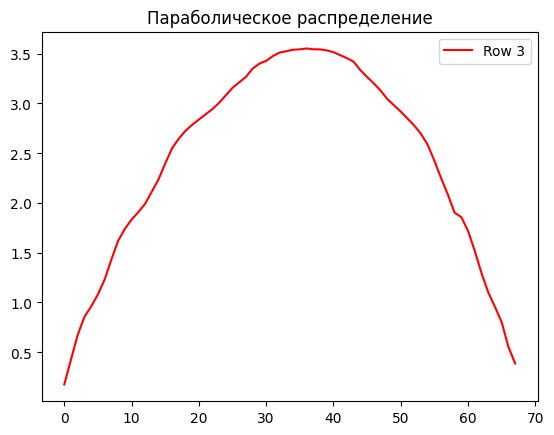

Максимум параболического распределения: 3.551


In [8]:
import re
import numpy as np
import matplotlib.pyplot as plt

def find_errors(file_path):
    errors = []
    with open(file_path, 'r') as f:
        for line_num, line in enumerate(f, start=1):
            elements = line.split()
            for col_num, element in enumerate(elements, start=1):
                if not re.match(r'^-?\d+(\.\d+)?(e[-+]?\d+)?$', element):
                    errors.append((line_num, col_num, element))
    return errors

def correct_errors(file_path, corrected_file_path):
    def clean_invalid_chars(element):
        cleaned_element = re.sub(r'[^0-9eE.-]', '0', element)
        try:
            float(cleaned_element)
            return cleaned_element
        except ValueError:
            return '0'

    with open(file_path, 'r') as f_in, open(corrected_file_path, 'w') as f_out:
        for line in f_in:
            elements = line.split()
            corrected_line = [clean_invalid_chars(element) for element in elements]
            f_out.write(' '.join(corrected_line) + '\n')

def transpose_data(file_path, transposed_file_path):
    data = np.loadtxt(file_path)
    transposed_data = data.T
    np.savetxt(transposed_file_path, transposed_data, fmt='%f')

def count_values(file_path):
    data = np.loadtxt(file_path)
    less_than_one = np.sum(data < 1)
    greater_than_one = np.sum(data > 1)
    return less_than_one, greater_than_one

def is_parabolic(row):
    peak_index = np.argmax(row)
    left_part = row[:peak_index]
    right_part = row[peak_index+1:]
    
    if not np.all(np.diff(left_part) > 0):
        return False
    if not np.all(np.diff(right_part) < 0):
        return False
    return True

def find_parabolic_distribution(file_path):
    data = np.loadtxt(file_path)
    
    for i, row in enumerate(data):
        if i < 1:
            continue
        if is_parabolic(row):
            
            plt.plot(row, label=f'Row {i}',color='red')
            plt.title('Параболическое распределение')
            plt.legend()
            plt.show()
            return row
    
    print("Параболическое распределение не найдено.")
    return None

def find_max_of_parabola(parabolic_data):
    max_value = np.max(parabolic_data)
    return max_value

file_path = r'C:\Users\bulyn\ПАД\---\lab2\2__10916__табл данные (2).txt'
corrected_file_path = 'corrected_data.txt'
transposed_file_path = 'transposed_data.txt'

errors = find_errors(file_path)
print("Ошибки найдены в следующих ячейках:", errors)

correct_errors(file_path, corrected_file_path)

transpose_data(corrected_file_path, transposed_file_path)

less_than_one, greater_than_one = count_values(transposed_file_path)
print(f"Количество значений меньше 1: {less_than_one}")
print(f"Количество значений больше 1: {greater_than_one}")

row_with_parabola = find_parabolic_distribution(transposed_file_path)

if row_with_parabola is not None:
    max_value = find_max_of_parabola(row_with_parabola)
    print(f"Максимум параболического распределения: {max_value}")
else:
    print("Параболическое распределение не найдено.")


In [7]:
for i in range(1, len(transposed_file_path)-1):
	print(i)
	best_col = is_parabolic(transposed_file_path[i,:])
	if best_col:
		print(f"Столбец с наилучшим параболическим распределением: {i + 1}")
		# 6.2. Найти максимум параболы
		x_max = find_maximum_parabola(transposed_file_path, i)
		print(f"Максимум параболы достигается при x = {x_max}")
		plot_parabolic(transposed_file_path, i)

1


TypeError: string indices must be integers, not 'tuple'

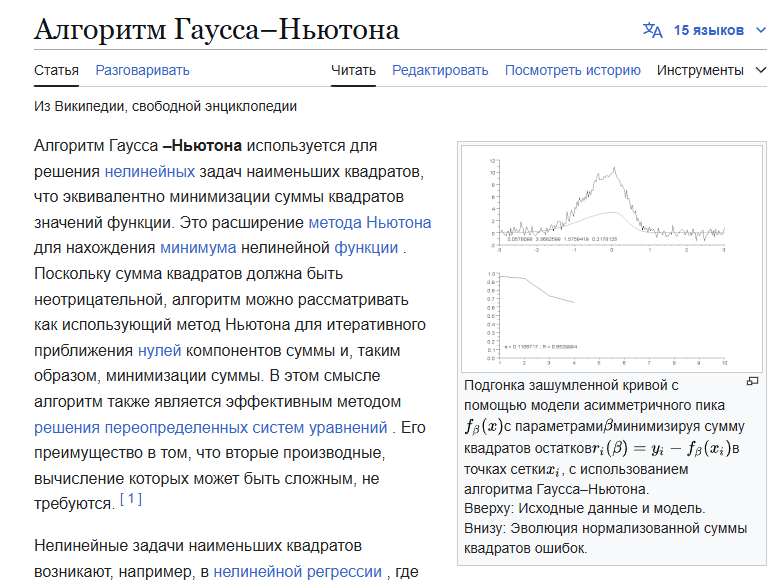